# Day 3: Numpy 

Numpy (numerical python) is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Originally Python was not created for calculations. Therefore numpy was introduced. Without numpy, calculating machine learning algorithms wouldn't be possible. 

Followings are the main reasons behind the fast speed of Numpy.

- Numpy array is a collection of similar data-types which are densely packed in memory. A Python list can have different data-types, which puts lots of extra constraints while doing computation on it.
- Numpy is able to divide a task into multiple subtasks and process them parallelly.
- Numpy functions are implemented in C. Which again makes it faster compared to Python Lists.

We will see an example of Python vs. Numpy in the exercises.

Documentation for Numpy is available at: https://docs.scipy.org/doc/numpy/reference/

In [1]:
## Python Numpy doc

In [2]:
import numpy as np

## Array Basics

We can initialize numpy arrays from a list

In [3]:
X = np.array([1, 5, 8 ,4])
Y = np.array([2, 3, 4, 5])

### Operations

In [4]:
A = X + Y           # element-wise addition
M = X * Y           # element-wise multiplication
D = np.dot(X, Y)    # dot product
T = X.T             # transposing
X_tail = X[2:]      # indexing (similar to lists)

A, M, D, T, X_tail

(array([ 3,  8, 12,  9]),
 array([ 2, 15, 32, 20]),
 69,
 array([1, 5, 8, 4]),
 array([8, 4]))

When we do the same with normal python lists, we see that the results are a little different

In [5]:
X_list = [1, 5, 8 ,4]
Y_list = [2, 3, 4, 5]

In [6]:
print(X_list + Y_list)
print(X_list * Y_list) # -> raises Exception

[1, 5, 8, 4, 2, 3, 4, 5]


TypeError: can't multiply sequence by non-int of type 'list'

We see, that list cannot be multiplied easily. To get the equivalent behavior with lists, we can use list comprehension.

In [8]:
A_list = [x + y for x, y in zip(X, Y)] # element-wise addition
M_list = [x * y for x, y in zip(X, Y)] # element-wise multiplication
D_list = sum([x * y for x, y in zip(X, Y)]) # dot product

A_list, M_list, D_list

([3, 8, 12, 9], [2, 15, 32, 20], 69)

The numpy way is easier to read, and also more compact than the pure python way

## Shape of arrays

The command _shape_ on a numpy array lets us know the number of dimensions and the size of each dimension. _ndim_ also tells us the number of dimensions directly.

In [9]:
print(A.shape, M.shape, D.shape, A.ndim) 

(4,) (4,) () 1


## Matrices

Before, we only had arrays with one dimension. We can easily also build numpy arrays with more than one dimension, which can be used as matrices. To build matrices, we can nest lists.

In [10]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
print(A)
print(A.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [11]:
B = np.array([[1, 3, 5],
              [2, 4, 6]])

We can use the same operations as before. But for the function _.dot_, we need to make sure that the shapes of the matrices are aligned 

In [12]:
# Elementwise multiplication
A * B

array([[ 1,  6, 15],
       [ 8, 20, 36]])

In [13]:
# Matrix-matrix multiplication
np.dot(A, B.T)

array([[22, 28],
       [49, 64]])

In [14]:
np.dot(A, A) # -> raises Exception

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

## Special Array Initializations

Instead of typing each single value for an array by hand, numpy offers a couple fast ways to initialize arrays. Here are some examples.

In [19]:
A = np.zeros((3, 3))         # array of size 3x3 filled with zeros
B = np.ones((3, 3))          # same, but filled with ones
C = np.diag((1.0, 2.0, 3.0)) # diagonal matrix
D = np.eye(3)                # identity matrix
E = np.random.rand(3, 3)     # random numbers
F = np.triu(B)               # upper triagonal matrix

print(A)
print(B)
print(C)
print(D)
print(E)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.12727283 0.26918438 0.80532033]
 [0.89854287 0.08540516 0.64548064]
 [0.67240837 0.46266587 0.89260372]]


## Array types

Each array only has one value type, unlike normal python lists. We can check to type with _dtype_.

In [20]:
A = np.ones((2, 2))
type(A), A.shape, A.size, A.ndim, A.dtype

(numpy.ndarray, (2, 2), 4, 2, dtype('float64'))

In [21]:
B = np.ones((3,3,3))
type(B), B.shape, B.size, B.ndim, B.dtype

(numpy.ndarray, (3, 3, 3), 27, 3, dtype('float64'))

## Casting

Similar to raw types, we can cast numpy arrays to certain types. The function _astype_ returns a copy of the array with the defined type. If we do operations on two or more arrays with different data type, the highest precision is used for the returned array. 

In [22]:
E = A.astype('float32')
A.dtype, E.dtype, (A + E).dtype

(dtype('float64'), dtype('float32'), dtype('float64'))

## Array Rearanging

Sometimes, we need to reorganize an array to a different shape to do certain operations. Thereby we dont change the content of the array, but only change the order, switch dimensions etc.

In [23]:
A = np.array([[1, 2, 3], [4, 5, 6]])

In [24]:
print(A)

[[1 2 3]
 [4 5 6]]


_reshape_ lets us reshape the array into a specified new form. We have to make sure, that the specified form can be achieved with the current form.

In [25]:
print(A.reshape((3,2))) # reshape into a 3x2 matrix

[[1 2]
 [3 4]
 [5 6]]


In [26]:
print(A.reshape((1,6))) # reshape into a 1x6 matrix (this array still has 2 dimensions!)

[[1 2 3 4 5 6]]


In [27]:
print(A.reshape(6)) # reshape into a 6 array (this array only has 1 dimensions!)

[1 2 3 4 5 6]


In [28]:
print(A.reshape((2,6))) # will throw error, because we cannot rearange 2x3 into 2x6 (product must be same)

ValueError: cannot reshape array of size 6 into shape (2,6)

Another quick way to flatten array is to use _ravel_

In [32]:
print(A.ravel()) # same as A.reshape(6), but better since we do not need to know the size of the array

[1 2 3 4 5 6]


In [33]:
B = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])

In [34]:
B.ravel() # ravel appends rows  

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

_transpose_ gives us the transpose of the array (switch rows and columms)

In [35]:
C = B.transpose()

In [36]:
C.ravel()

array([1, 4, 7, 2, 5, 8, 3, 6, 9])

There are a lot other functions of course for reorganization! These are

## Broadcasting

While some numpy operations (like `dot()`, ) require your input arrays to have an exact shape, some other numpy functions are able to handle array operations when the shapes do not align. This is called __broadcasting__.
When two arrays have different shapes, the array with smaller dimension is "broadcasted" across the larger array to have compatible types.

In [37]:
# we want to scale the array a by 2
a = np.array([1.0, 2.0, 3.0]) 
scale = np.array([2.0, 2.0, 2.0])
a * scale

array([2., 4., 6.])

In [38]:
# way faster, is to use broadcasting (simple)
a = np.array([1.0, 2.0, 3.0]) 
scale = 2
a * scale

array([2., 4., 6.])

In [39]:
# we can also do this with all other operations
a + 2, a - 2, a/2

(array([3., 4., 5.]), array([-1.,  0.,  1.]), array([0.5, 1. , 1.5]))

We see, we get the same result, even though _scale_ is not the same shape as _a_(technically _scale_ does not even have a shape!). But we can also broadcast arrays with different shapes. The general rule is:

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when:

- they are equal, or

- one of them is 1

More info is available under:(https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

In [44]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

In [45]:
x + y

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [46]:
xx.shape

(4, 1)

In [47]:
y.shape

(5,)

In [48]:
(xx + y).shape

(4, 5)

In [49]:
xx + y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [50]:
x.shape

(4,)

In [51]:
z.shape

(3, 4)

In [52]:
(x + z).shape

(3, 4)

In [53]:
x + z


array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

![](numpy_broadcasting.png)

## Indexing

Just like normal python lists, we can use the standard indexing techniques to cut and slice parts from a numpy array. We can use known indexing techniques for every dimension of the numpy array.

In [54]:
A = np.arange(30).reshape(6, 5)
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


In [55]:
print(A[3, :]) # select 3rd row, every column (so the entire 3rd row)

[15 16 17 18 19]


In [56]:
print(A[:, 3]) # select 3rd row, every column (so the entire 3rd row)

[ 3  8 13 18 23 28]


The colon _:_ indicates that we take all values in that dimension.

In [57]:
print(A[3]) # this works too, if only the first dimension is specfied, 
            # the rest is just assumed to be filled with :

[15 16 17 18 19]


In [58]:
print(A[:,3]) # this doesnt work, since numpy needs to know what you want before

[ 3  8 13 18 23 28]


We can also select windows by setting start and end position of the slicing

In [59]:
print(A[1:5, 1:4]) # get 1 until 5th row, and only 1st to 4th row

[[ 6  7  8]
 [11 12 13]
 [16 17 18]
 [21 22 23]]


We can also indicate steps when slicing

In [60]:
print(A[::2, 1::2])

[[ 1  3]
 [11 13]
 [21 23]]


And e can also use negative indices

In [61]:
print(A[:, -2:])

[[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]
 [28 29]]


__New__: We can also use a list or an array of indices (so must contain integers) to select certain dimensions

In [62]:
print(A[:, [1, 4]]) #Select column 1 and 4

[[ 1  4]
 [ 6  9]
 [11 14]
 [16 19]
 [21 24]
 [26 29]]


In [63]:
idx = [1, 4, 6]
print(A[idx])

IndexError: index 6 is out of bounds for axis 0 with size 6

If we use use two or more array/lists as indices, we need to make sure they have the same size/ or can be broadcasted.

In [64]:
idx_rows = [1, 3]
idx_col = [0, 2, 4]
print(A[idx_rows, idx_col])

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

In [65]:
idx_col = [0, 2]
print(A[idx_rows, idx_col]) # get the items at position (1,0) and (3,2)

[ 5 17]


In [66]:
diag = np.arange(5)
print(A[diag,diag])

[ 0  6 12 18 24]


We can not do this for normal python lists.

In [67]:
a = [1, 2, 3, 4, 5]

In [68]:
a[[1, 4]] # this does not work with normal python lists

TypeError: list indices must be integers or slices, not list

__Also New:__ Boolean indexing. We can use an array of booleans for index a given array, similar to array indexing. At each position the boolean value TRUE will give index/cut the value, while False will not. The boolean array is therefore a mask, that will give us out

In [69]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [70]:
bool_array = np.asarray([True, False, False, True, False])
a[bool_array] # only at position 0 and 3 the boolean array is True, 
              # therefore we cut out only these values

array([0, 3])

In [71]:
b = np.arange(5,10)
b[bool_array]

array([5, 8])

The boolean mask array can also have more dimension than one

In [72]:
a = np.random.rand(4, 4)
print(a)
b = a > 0.5

[[0.92382989 0.11025895 0.68407334 0.13394617]
 [0.35910835 0.5212697  0.33875169 0.78431225]
 [0.82853541 0.64668857 0.87580284 0.53016131]
 [0.45646814 0.24468928 0.79194506 0.64938105]]


We see, with boolean operation such as <, we can also create boolean arrays. This is technically broadcasting, since we apply the operation to each value in the array.

In [73]:
print(b)
c = b.astype(int)
print(c)
print(a[b])

[[ True False  True False]
 [False  True False  True]
 [ True  True  True  True]
 [False False  True  True]]
[[1 0 1 0]
 [0 1 0 1]
 [1 1 1 1]
 [0 0 1 1]]
[0.92382989 0.68407334 0.5212697  0.78431225 0.82853541 0.64668857
 0.87580284 0.53016131 0.79194506 0.64938105]


Boolean indexing is realy quick to see where certain conditions are met in an array, and to extract these values fast. Numpy also has some build in boolean functions, that we can apply on (boolean) arrays. We can also apply them on other types of array, where the boolean casting is done.

In [74]:
print(np.any(b)) # ask if any value if True

True


In [75]:
print(np.all(b)) # ask if all values are True

False


Many functions allow to set an axis, in which the function should be applied. The result is then not anymore a single boolean/value, but an array of booleans/value. 

In [76]:
np.any(b, axis=1), np.all(b, axis=0)

(array([ True,  True,  True,  True]), array([False, False, False, False]))

In [77]:
np.any(a), np.all(a)

(True, True)

In [78]:
a[1,1] = 0

In [79]:
np.any(a), np.all(a)

(True, False)

## Numpy Functions

There are a ot of numpy functions, to to all kind of stuff with numpy arrays. All basic arithmetic operations are also available in numpy and can be applied to arrays element-wise. There are also some powerful ones, and chances are anything you want to do with arrays, there is already a function to help you. Here are some examples:

In [80]:
y = np.random.rand(1000) # create an array with 1000 random values

In [81]:
y.max(),y.min(),y.std(),y.mean()

(0.9990950899099604,
 8.428934305970692e-06,
 0.2912269388713766,
 0.49202358686173353)

In [82]:
x = np.array([1,4,5,6,-20])
print(np.argmin(x)) # returns the indices of the minimum value
print(np.argmin(a)) # a is flattened, therefore we get only one value 

4
5


In [83]:
# same with argmax
print(np.argmax(x)) # returns the indices of the minimum value
print(np.argmax(a))

3
0


The `sort()` funtion sorts a list, and the function `argsort()` gives the indices of the sorted list.

In [84]:
x, np.sort(x), np.argsort(x)

(array([  1,   4,   5,   6, -20]),
 array([-20,   1,   4,   5,   6]),
 array([4, 0, 1, 2, 3]))

What `intersect1d()` function will do is, it will return the intersection of 2 arrays — meaning the items that are common in both arrays. Unlike the previous functions, it won't return the index position, it will return the actual values.

In [85]:
arr1 = np.array([3,4,5,6,7])
arr2 = np.array([6,6,7,8,3])
np.intersect1d(arr1, arr2)

array([3, 6, 7])

The `where` function returns the elements of an array depending on a condition. Very similar to list comprehensions (Filtering and Mutation)

In [86]:
a = np.arange(10)
print(np.where(a < 5, a, a*10))

[ 0  1  2  3  4 50 60 70 80 90]


We can also do this on multidimensional arrays

In [87]:
np.where([[True, False], [True, True]],
         [[1, 2], 
          [3, 4]], # if True pick from here, same position
         
         [[9, 8], 
          [7, 6]]  # if False pick from here, same position
        )

array([[1, 8],
       [3, 4]])

The function `nonzero()` returns the indices of the elements that are non-zero.

In [88]:
x = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
x

array([[3, 0, 0],
       [0, 4, 0],
       [5, 6, 0]])

In [89]:
np.nonzero(x)

(array([0, 1, 2, 2]), array([0, 1, 0, 1]))

In [90]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a > 3

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [91]:
np.nonzero(a > 3)

(array([1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2]))

In [92]:
(a > 3).nonzero()

(array([1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2]))

## Basic Plotting
We gonna start with some basic plotting, for which we are going to use the matplotlib library. Its commonly used and is compatible with numpy and pandas(gonna come later).
As with numpy, we need to import matplotlib before we can use it.

In [93]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# The command "%matplotlib inline" tells IPython notebook 
# that the plots should be rendered inside the notebook.

First, we need to create a some values

In [94]:
x = np.arange(0, 10.001, 0.25)
y = np.sin(x)
z = np.cos(x)

With plot, we 

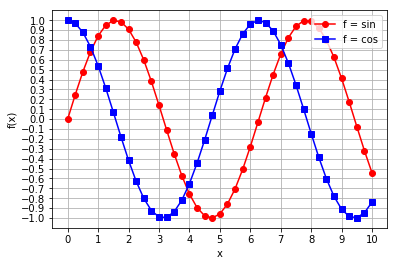

In [95]:
plt.plot(x, y, 'o-', color='red', label='f = sin')
plt.plot(x, z, 's-', color='blue', label='f = cos')
xtks = np.arange(0, 10.01, 1)
ytks = np.arange(-1,1.01,0.1)
plt.xticks(xtks)
plt.yticks(ytks)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc = 'upper right')
plt.grid(True)